<b><font size=3> Programming Exercise 1 | Linear Regression </b></font>

In this exercise, we implement linear regression and get to see it work on data.

In [656]:
import os 
import numpy as np

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
%matplotlib inline

<b> 1 | Warm up exercise </b>

In [648]:
def warmUpExercise():
    return (np.identity(5))

<b> 2 | Linear Regression with one variable </b>

In [658]:
datafile = 'data/ex1data1.txt'
data = np.loadtxt(datafile, delimiter=',')
data.shape

(97, 2)

In [650]:
Y = data[:,1]
X = data[:,0]

<b> 2.1 | Plotting the Data </b>

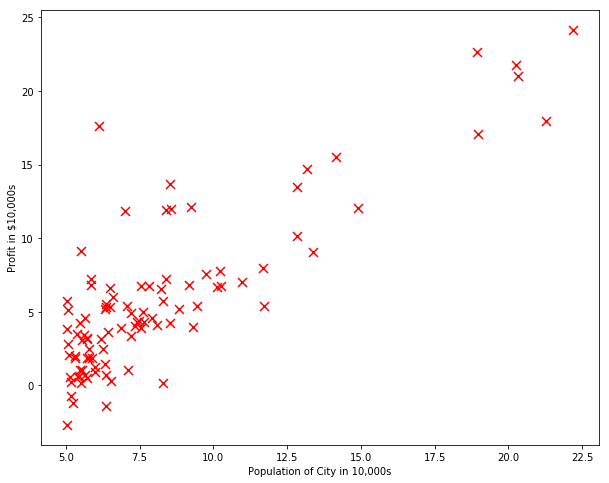

In [651]:
#plot data
plt.figure(figsize=(10,8))
plt.scatter(X, Y, marker = 'x', c = 'r', s = 80)
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")

<b> 2.2 | Gradient Descent </b>

In [652]:
class LinearModel:
    def __init__(self, alpha=0.01, epochs=1500):
        self._alpha = alpha
        self._epochs = epochs
        
        self.cost = []
        self.theta = [] 
        
        self.means = 0
        self.stddevs = 0

        self._current_epoch = 0
        self._converged = False
    
        self.means = 0
        self.stddevs = 0
      
    def _X_matrix(self,Xs):
        return np.column_stack((np.ones(len(Xs)), Xs))
    
    def _sigmoid(self,Z):
        return 1/(1+np.exp(-Z))
    
    def _compute_cost(self,H,Ys):
        m = Ys.shape[0]
        J = (1/(2*m))*np.sum(np.square(H-Ys))
        return J
    
    def predict(self, x):
        return np.dot(x, self.theta)
    
    def gradient_descent(self,Xs,Ys):   
        #initialisation
        Xs = self._X_matrix(Xs)
        self.theta = np.zeros(Xs.shape[1])
        gd_theta = np.ones(Xs.shape[1])

        # continue until convergence
        while (self._current_epoch < self._epochs) and (max(abs(gd_theta)) >=.01):
            # prediction
            H = np.dot(Xs,self.theta)
          
            #update thetas
            gd_theta = np.dot(Xs.T, (H-Ys))/(Xs.shape[0])
            self.theta = self.theta - self._alpha*gd_theta
            
            #compute and record cost function
            self.cost.append([self._current_epoch+1,self._compute_cost(H,Ys)])
            self._current_epoch += 1
            
        self._converged = True
        return self._converged



Trained loss: 4.483411453374869
Training epochs: 1500
Thetas: [-3.63029144  1.16636235]




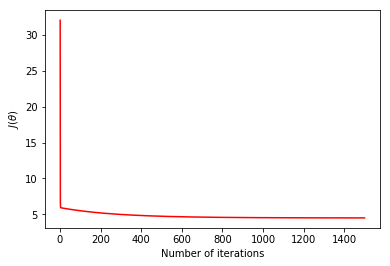

In [655]:
m = LinearModel()
m.gradient_descent(X,Y)
    

print('\n')
print('Trained loss:', m.cost[-1][1])
print('Training epochs:', m.cost[-1][0])
print('Thetas:',m.theta)
print('\n')
    
plt.plot(np.array(m.cost)[:,0],np.array(m.cost)[:,1],color='red')
plt.xlabel('Number of iterations')
plt.ylabel(r'$J(\theta)$')
plt.show()    

In [618]:
x1 = np.array([1,3.5])
x2 = np.array([1,7])

predict1 = m.predict(x1)
predict2 = m.predict(x2)

print("For population = 35,000, we predict a profit of ${:,.2f}".format(predict1*10000))
print("For population = 70,000, we predict a profit of ${:,.2f}".format(predict2*10000))

For population = 35,000, we predict a profit of $4,519.77
For population = 70,000, we predict a profit of $45,342.45


<b> 2.3 | Debugging </b>

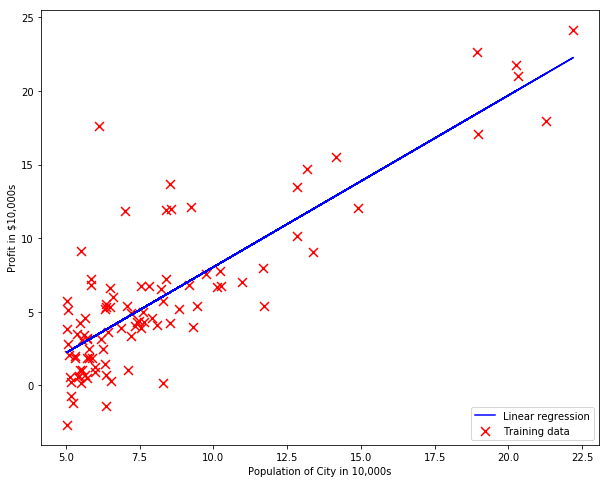

In [619]:
#plot data
plt.figure(figsize=(10,8))
plt.scatter(X, Y, marker = 'x', c = 'r', s = 80, label = 'Training data')
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")

#plot line
l_reg =(m.theta[0]+m.theta[1]*X)
plt.plot(X, l_reg, c='b', label = 'Linear regression')
plt.legend(loc = 4)

<b> 3 | Linear regression with multiple variables </b>

In [623]:
os.chdir('/Users/christinakouride/Documents/Python/Learning/Andrew Ng - ML course/ex1')

data2 = np.loadtxt('ex1data2.txt', delimiter=',')

In [624]:
X1 = data2[:,0] #Size of house (in square feet)
X2 = data2[:,1] #Number of bedrooms
X = np.c_[X1,X2]

Y  = data2[:,2] #Price

<b> 3.1 | Feature Normalization </b>

In [625]:
def featureNormalize(Xs):
    n_features = Xs.shape[1]

    mu = np.array([np.mean(Xs[:,i]) for i in range(n_features)])
    sigma = np.array([np.std(Xs[:,i]) for i in range(n_features)])
    
    Xs = (Xs - mu)/sigma
    return Xs, mu, sigma

In [629]:
#scale features and set them to zero mean
Xnorm, mu, sigma = featureNormalize(X)

print("Mean: ",mu)
print("Standard deviation: ",sigma)

Mean:  [2000.68085106    3.17021277]
Standard deviation:  [7.86202619e+02 7.52842809e-01]


<b> 3.2 | Gradient Descent </b>

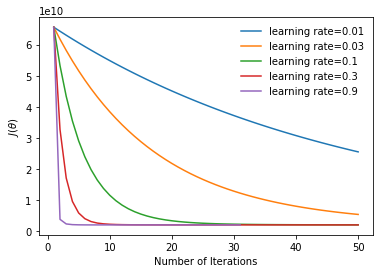

In [643]:
alphas = [0.01, 0.03, 0.1, 0.3, 0.9]

for alpha in alphas:
    m = LinearModel(alpha, 50)
    m.gradient_descent(Xnorm,Y)
    plt.plot(np.array(m.cost)[:,0],np.array(m.cost)[:,1],label='learning rate={0}'.format(alpha))
    
plt.ylabel(r'$J(\theta)$')
plt.xlabel('Number of Iterations')
plt.legend(loc=1, frameon=False)

In [641]:
print("Optimal alpha: ", alphas[-1])
print("Theta at optimal alpha: ",m.theta)
x = np.array([1650,3])

Optimal alpha:  0.9
Theta at optimal alpha:  [340412.65957447 109447.78702878  -6578.34541324]


In [634]:
xnorm = (x-mu)/sigma
xnorm = np.hstack((1,xnorm))

In [635]:
ypred = np.dot(xnorm, m.theta)

print("A 1650 sq-ft 3 br house will cost ${:,.2f}".format(ypred))

A 1650 sq-ft 3 br house will cost $293,081.47
